In [1]:
import os
import math
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing as skpp
from sklearn.model_selection import train_test_split 
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

c:\users\ledra\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN, GRU
from keras.losses import mean_squared_error as k_mse
from keras.backend import sqrt as k_sqrt
import keras.backend as K

Using TensorFlow backend.


In [3]:
filepath=os.path.join('international-airline-passengers.csv')

In [4]:
dataframe=pd.read_csv(filepath,usecols=[1],header=0)

In [5]:
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [30]:
dataset=dataframe.values
dataset=dataframe.astype(np.float32)

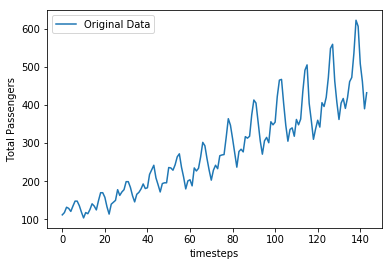

In [31]:
plt.plot(dataset,label='Original Data')
plt.legend()
plt.xlabel('timesteps')
plt.ylabel('Total Passengers')
plt.show()

In [32]:
# normalize the dataset
scaler = skpp.MinMaxScaler(feature_range=(0, 1))
impute=skpp.Imputer()
imput_dataset = impute.fit_transform(dataset)
normalized_dataset=scaler.fit_transform(imput_dataset)

In [33]:
x=np.asarray(normalized_dataset[0:-1])
y=np.asarray(normalized_dataset[1:])


In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,shuffle=False)
print(X_train.shape)
X_train.shape[0]



(96, 1)


96

# Keras


In [21]:
tf.reset_default_graph()
keras.backend.clear_session()
n_x=1
# reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)

In [22]:
# create and fit the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=20, batch_size=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
96/96 [==============================] - 0s 4ms/step - loss: 0.0206
Epoch 2/20
96/96 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 3/20
96/96 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 4/20
96/96 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 5/20
96/96 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 6/20
96/96 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 7/20
96/96 [==============================] - 0s 1ms/step - lo

In [23]:
# make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

#invert originals
y_train_orig = scaler.inverse_transform(Y_train)
y_test_orig = scaler.inverse_transform(Y_test)

# calculate root mean squared error
trainScore = k_sqrt(k_mse(y_train_orig[:,0],
                          y_train_pred[:,0])
                   ).eval(session=K.get_session())
print('Train Score: {0:.2f} RMSE'.format(trainScore))
testScore = k_sqrt(k_mse(y_test_orig[:,0],
                         y_test_pred[:,0])
                  ).eval(session=K.get_session())
print('Test Score: {0:.2f} RMSE'.format(testScore))

Train Score: 22.71 RMSE
Test Score: 53.34 RMSE


In [28]:
trainPredictPlot = np.empty_like(normalized_dataset)
trainPredictPlot.shape

(145, 1)

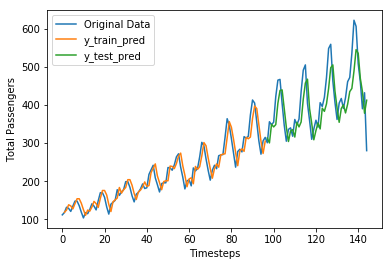

In [29]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(normalized_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_x:len(y_train_pred)+n_x, :] = y_train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(normalized_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+(n_x*2)-1:len(normalized_dataset),:]=y_test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(normalized_dataset),label='Original Data')
plt.plot(trainPredictPlot,label='y_train_pred')
plt.plot(testPredictPlot,label='y_test_pred')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Total Passengers')
plt.show()

# keras LSTM

In [36]:
tf.reset_default_graph()
keras.backend.clear_session()

# reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)


In [37]:
# create and fit the LSTM model
model = Sequential()
model.add(LSTM(units=4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=20, batch_size=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
96/96 [==============================] - 1s 11ms/step - loss: 0.0234
Epoch 2/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 3/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 4/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 5/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 6/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 7/20
96/96 [==============================] - 0s 2ms/step -

In [38]:
# make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

# invert originals
y_train_orig = scaler.inverse_transform(Y_train)
y_test_orig = scaler.inverse_transform(Y_test)

# calculate root mean squared error
trainScore = k_sqrt(k_mse(y_train_orig[:,0],
                          y_train_pred[:,0])
                   ).eval(session=K.get_session())
print('Train Score: {0:.2f} RMSE'.format(trainScore))
testScore = k_sqrt(k_mse(y_test_orig[:,0],
                         y_test_pred[:,0])
                  ).eval(session=K.get_session())
print('Test Score: {0:.2f} RMSE'.format(testScore))

Train Score: 23.35 RMSE
Test Score: 54.11 RMSE


In [40]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(normalized_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_x:len(y_train_pred)+n_x, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(normalized_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+(n_x*2)-n_x:len(normalized_dataset), :] = y_test_pred


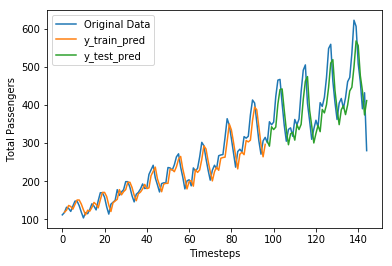

In [41]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(normalized_dataset),label='Original Data')
plt.plot(trainPredictPlot,label='y_train_pred')
plt.plot(testPredictPlot,label='y_test_pred')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Total Passengers')
plt.show()

In [42]:
tf.reset_default_graph()
keras.backend.clear_session()


In [43]:
# reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)


In [44]:
# create and fit the GRU Model
model = Sequential()
model.add(GRU(units=4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=20, batch_size=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 4)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0393
Epoch 2/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 3/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 4/20
96/96 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 5/20
96/96 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 6/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 7/20
96/96 [==============================] - 0s 2ms/step - lo

In [45]:
# make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)


In [46]:
#invert originals
y_train_orig = scaler.inverse_transform(Y_train)
y_test_orig = scaler.inverse_transform(Y_test)

In [47]:

# calculate root mean squared error
trainScore = k_sqrt(k_mse(y_train_orig[:,0],
                          y_train_pred[:,0])
                   ).eval(session=K.get_session())
print('Train Score: {0:.2f} RMSE'.format(trainScore))
testScore = k_sqrt(k_mse(y_test_orig[:,0],
                         y_test_pred[:,0])
                  ).eval(session=K.get_session())
print('Test Score: {0:.2f} RMSE'.format(testScore))

Train Score: 23.40 RMSE
Test Score: 54.57 RMSE


In [49]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(normalized_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_x:len(y_train_pred)+n_x, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(normalized_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+(n_x*2)-n_x:len(normalized_dataset), :] = y_test_pred


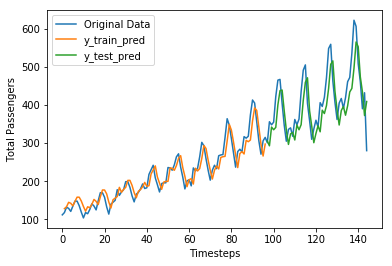

In [50]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(normalized_dataset),label='Original Data')
plt.plot(trainPredictPlot,label='y_train_pred')
plt.plot(testPredictPlot,label='y_test_pred')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Total Passengers')
plt.show()